In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('messi5.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

In [3]:
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

In [4]:
# Step 1
# 1. GC_INIT_WITH_RECT   
# 첫번째는 이미지에서 전경이 포함되는 영역을 사각형으로 대략적으로 지정합니다. 단, 이때 지정한 사각형 영역 안에는 전경이 모두 포함되어 있어야 합니다. 

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)
img1 = img*np.where((mask==2)|(mask==0),0,1).astype('uint8')[:,:, np.newaxis]
mask1 = mask.copy()  # for debugging 
 

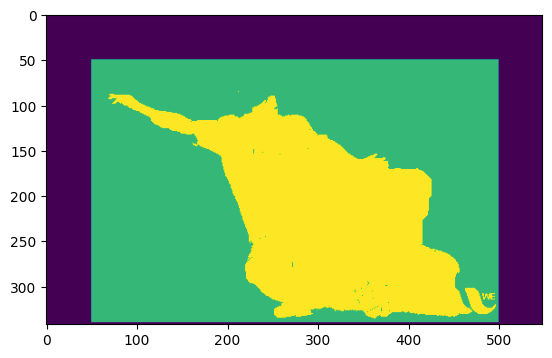

In [5]:
plt.imshow(mask)

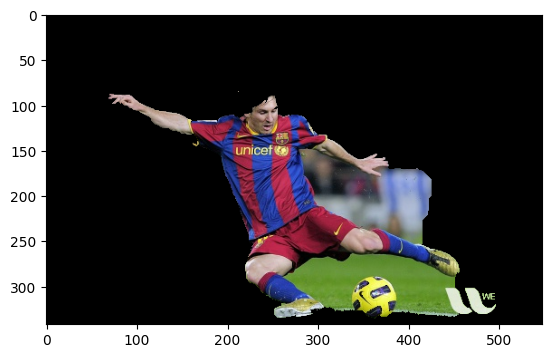

In [6]:
plt.imshow(img1[:,:,::-1])

In [9]:
newmask = cv2.imread('mask.png',0)
mask[newmask == 0] = 0
mask[newmask == 255] = 1
mask_before = mask.copy()  # for debugging

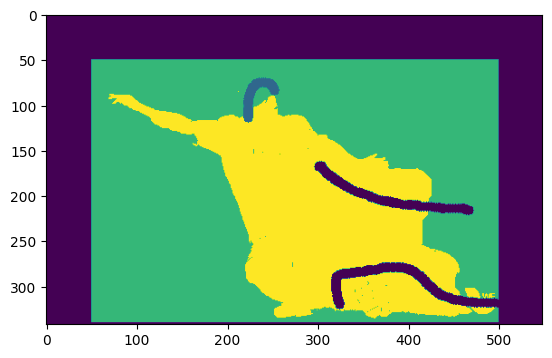

In [10]:
plt.imshow(mask_before)

In [11]:
cv2.grabCut(img,mask,None,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_MASK)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[2.95531629e-01, 1.74586358e-01, 2.33008840e-01, 8.16208593e-02,
         2.15252313e-01, 3.22637754e+01, 2.92536024e+01, 2.65467793e+01,
         9.64669583e+01, 9.65069157e+01, 9.88169996e+01, 6.18071393e+01,
         6.01258673e+01, 6.43821784e+01, 1.53811362e+02, 1.50270819e+02,
         1.37897505e+02, 5.09518665e+01, 1.40804781e+02, 9.97330926e+01,
         1.14574765e+02, 1.07235338e+02, 1.10068777e+02, 1.07235338e+02,
         1.07147549e+02, 1.11622934e+02, 1.10068777e+02, 1.11622934e+02,
         1.28354523e+02, 2.92453897e+02, 1.85028138e+02, 3.85367283e+01,
         1.85028138e+02, 1.77039486e+02, 1.01953624e+02, 3.85367283e+01,
         1.01953624e+02, 1.83605002e+02, 1.33647236e+02, 7.46366933e+01,
         6.44771735e+01, 7.46366933e+01, 1.3

In [12]:

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img2 = img*mask2[:,:,np.newaxis]

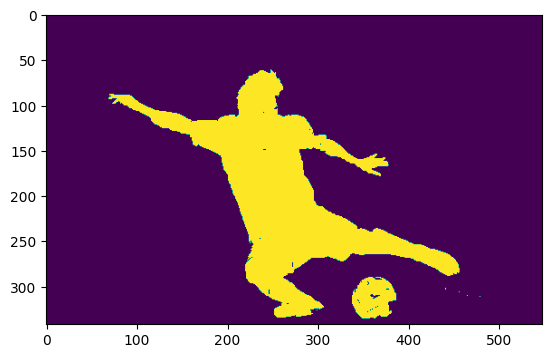

In [13]:
plt.imshow(mask2)

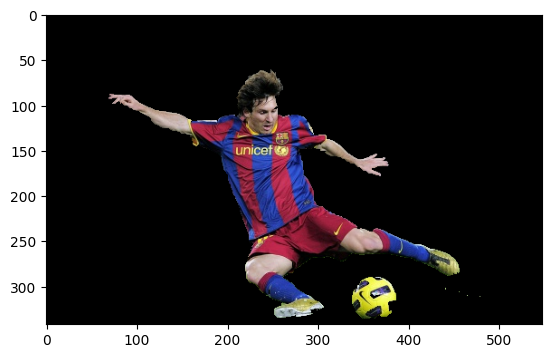

In [14]:
plt.imshow(img2[:,:,::-1])